## Predicting Card Balance

Import Libraries

In [1]:
from datetime import datetime 

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import statsmodels.api as sm
import statsmodels as smg

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
from pandas.plotting import scatter_matrix
import itertools

In [2]:
bal = pd.read_csv('balance.csv')

In [3]:
bal.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


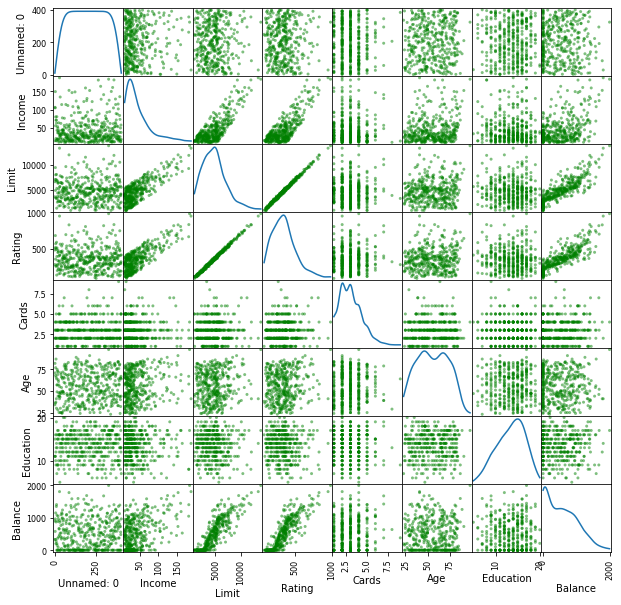

In [4]:
scatter_matrix(bal, alpha=0.5, figsize=(10, 10), diagonal='kde', color='green')
plt.show()

In [5]:
bal.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
bal['Gender'].replace(['Female',' Male'], [0,1],inplace=True)

bal.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,0,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,1,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,0,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,1,No,Yes,Caucasian,331


In [7]:
bal['Married'].replace(['No','Yes'], [0,1],inplace=True)
bal.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,No,1,Caucasian,333
1,2,106.025,6645,483,3,82,15,0,Yes,1,Asian,903
2,3,104.593,7075,514,4,71,11,1,No,0,Asian,580
3,4,148.924,9504,681,3,36,11,0,No,0,Asian,964
4,5,55.882,4897,357,2,68,16,1,No,1,Caucasian,331


In [8]:
bal['Student'].replace(['No','Yes'], [0,1],inplace=True)
bal.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


In [9]:
bal_new = pd.get_dummies(bal['Ethnicity'])

# Join the dummy variables to the main dataframe
bal = pd.concat([bal, bal_new], axis=1)
bal.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333,0,0,1
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331,0,0,1


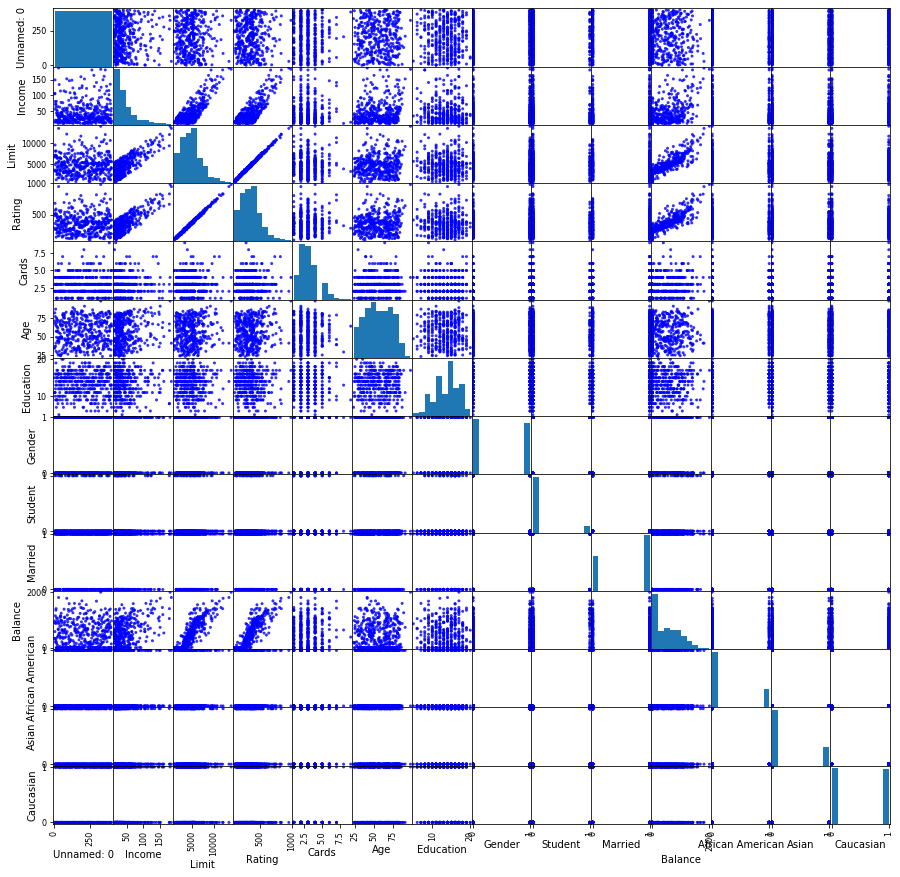

In [10]:
scatter_matrix(bal, alpha=0.8, figsize=(15, 15), diagonal='hist', color='blue')
plt.show()

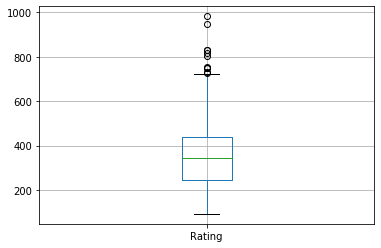

In [11]:
bal.boxplot('Rating')

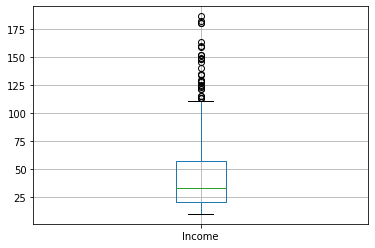

In [12]:
bal.boxplot('Income')

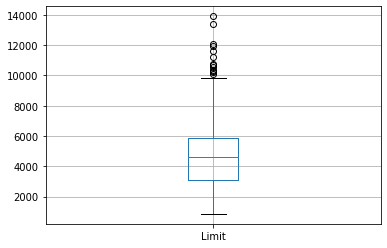

In [13]:
bal.boxplot('Limit')

In [14]:
X = np.column_stack((bal['Income'],bal['Limit'],bal['Rating'],bal['Cards'], bal['Age'], bal['Education'], bal['Gender'], bal['Student'], bal['Married'] ,bal['African American'],bal['Asian'],bal['Caucasian']))
# Add a constant, aka intercept, when working with statsmodels
X = sm.add_constant(X, prepend=True)  
# Set up our target, y
y = bal.Balance  
# OLS Regression: Ordinary Least Squares
results = sm.OLS(y,X).fit() 
# Print Summary Results
print(results.summary())
print("Beta parameters: {}".format(results.params))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          1.11e-253
Time:                        22:21:54   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -360.6680     25.839    -13.958      0.0

In [15]:
X = np.column_stack((bal['Income'],bal['Limit'],bal['Rating'],bal['Cards'], bal['Age'], bal['Education'], bal['Gender'], bal['Student'], bal['Married'] ,bal['Asian'],bal['Caucasian']))
X = sm.add_constant(X, prepend=True)  
y = bal.Balance  
results = sm.OLS(y,X).fit() 
print(results.summary())
print("Beta parameters: {}".format(results.params))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          1.11e-253
Time:                        22:21:54   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.8611     35.801    -13.683      0.0

Text(0, 0.5, 'studentized residuals')

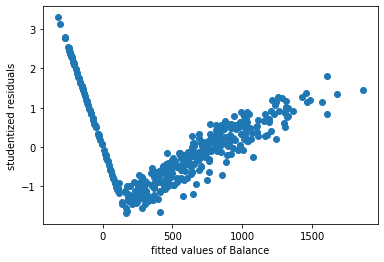

In [16]:
bal_resid = results.outlier_test()['student_resid']
plt.scatter(results.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')

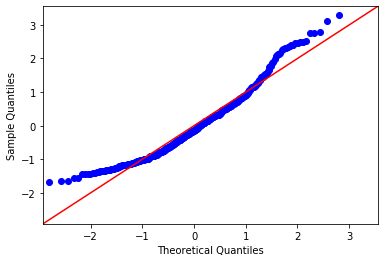

In [17]:
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          3.20e-179
Time:                        22:21:55   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.7275     32.099    -15.257      0.0

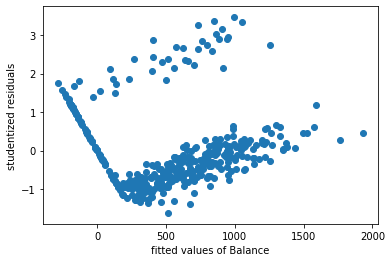

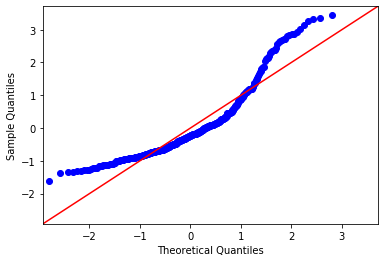

In [18]:
X1 = np.column_stack((bal['Income'],
                      bal['Limit'],
                      bal['Rating']
#                       bal['Cards'], 
#                       bal['Age'],  
#                       bal['Gender'], 
#                       bal['Education'],
#                       bal['Student'], 
#                       bal['Married'] ,
#                       bal['Asian'],
#                      bal['Caucasian']
                     ))
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Balance  

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           2.39e-87
Time:                        22:21:55   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2389.8694    114.829     20.812      0.0

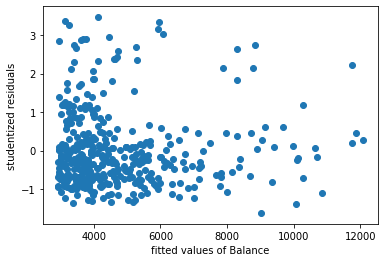

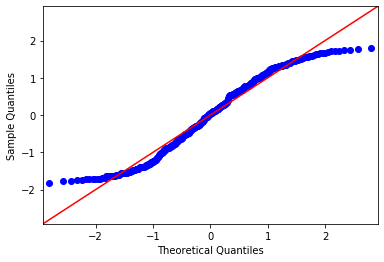

In [19]:
# Correlation

X1 = np.column_stack((bal['Income'],
                      
#                      bal['Limit'],
#                      bal['Rating'],
#                       bal['Cards'], 
#                       bal['Age'],  
#                       bal['Gender'], 
#                       bal['Education'],
#                       bal['Student'], 
#                       bal['Married'] ,
#                       bal['Asian'],
#                      bal['Caucasian']
                     ))
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Limit 

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid1 = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid1, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:21:55   Log-Likelihood:                -1568.1
No. Observations:                 400   AIC:                             3140.
Df Residuals:                     398   BIC:                             3148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4918      1.397     27.555      0.0

C:\ProgramData\Anaconda3\envs\tf-gpu+base_test\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


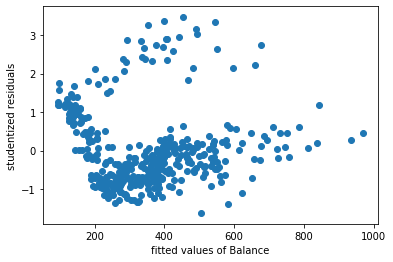

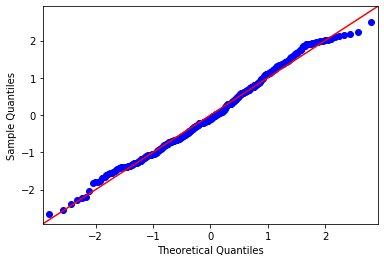

In [20]:
# Correlation - LIMIT VS RATING

X1 =(bal['Limit'])
#                      bal['Rating'],
#                       bal['Cards'], 
#                       bal['Age'],  
#                       bal['Gender'], 
#                       bal['Education'],
#                       bal['Student'], 
#                       bal['Married'] ,
#                       bal['Asian'],
#                      bal['Caucasian']
                     
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Rating  

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid1 = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid1, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1342.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          2.40e-177
Time:                        22:21:56   Log-Likelihood:                -2609.6
No. Observations:                 400   AIC:                             5225.
Df Residuals:                     397   BIC:                             5237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -385.1793     19.465    -19.789      0.0

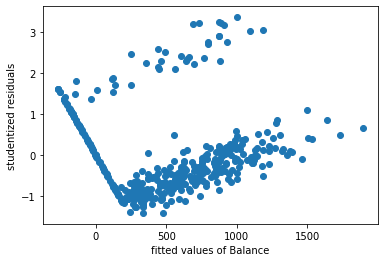

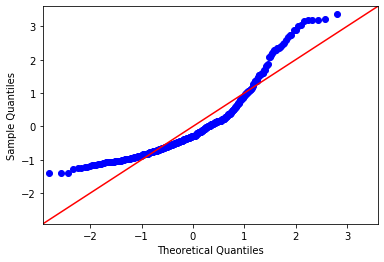

In [21]:
X1 = np.column_stack((bal['Income'],
                      bal['Limit']
#                      bal['Rating']
#                       bal['Cards'], 
#                       bal['Age'],  
#                       bal['Gender'], 
#                       bal['Education'],
#                       bal['Student'], 
#                       bal['Married'] ,
#                       bal['Asian'],
#                      bal['Caucasian']
                     ))
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Balance  

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          1.90e-120
Time:                        22:21:56   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -390.8463     29.069    -13.446      0.0

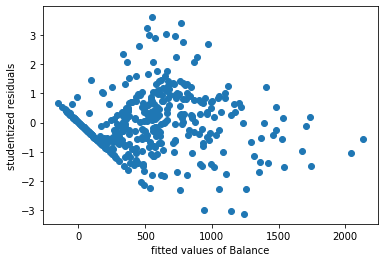

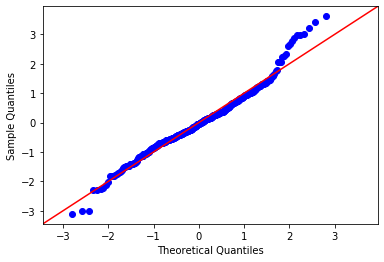

In [22]:
X1 = (bal['Rating'])
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Balance  

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          2.53e-119
Time:                        22:21:56   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -292.7905     26.683    -10.973      0.0

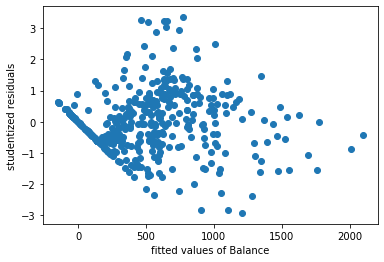

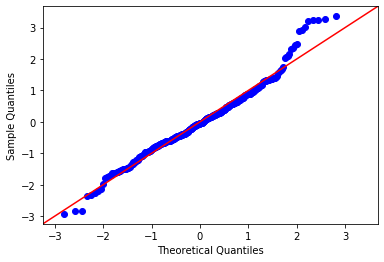

In [23]:
X1 = (bal['Limit'])
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Balance  

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          1.90e-120
Time:                        22:21:56   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -390.8463     29.069    -13.446      0.0

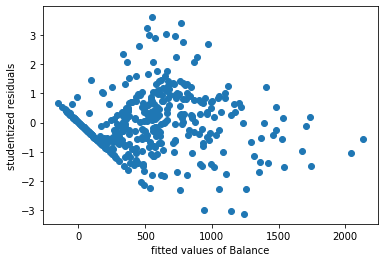

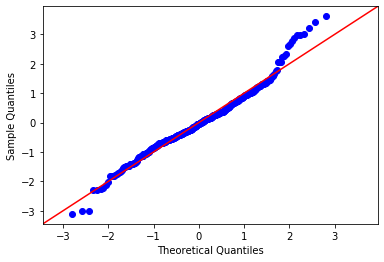

In [24]:

X1 = (bal['Rating'])
X1 = sm.add_constant(X1, prepend=True)  


y1 = bal.Balance  

results1 = sm.OLS(y1,X1).fit() 

print(results1.summary())

print("Beta parameters: {}".format(results1.params))
bal_resid = results1.outlier_test()['student_resid']
plt.scatter(results1.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()


In [25]:
# Create a variable list
L = ['Income', 
     'Limit',
     'Rating',
     'Cards', 
     'Age',  
     'Gender', 
     'Education',
     'Student', 
     'Married',
     'Asian',
     'Caucasian']

for i in L:
    print(i)

Income
Limit
Rating
Cards
Age
Gender
Education
Student
Married
Asian
Caucasian


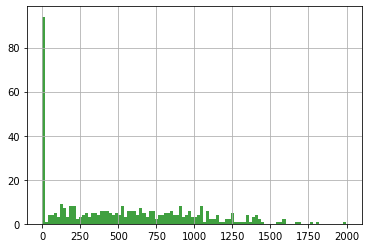

In [27]:
n, bins, patches = plt.hist(bal['Balance'], 100, density=False, facecolor='g', alpha=0.75)
plt.grid(True)

In [28]:
bal.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.0000,400.000000,400.00000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.482500,0.100000,0.61250,520.015000,0.2475,0.255000,0.49750
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877,0.4321,0.436407,0.50062
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.00000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,68.750000,0.0000,0.000000,0.00000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,0.000000,0.000000,1.00000,459.500000,0.0000,0.000000,0.00000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,863.000000,0.0000,1.000000,1.00000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000,1.0000,1.000000,1.00000


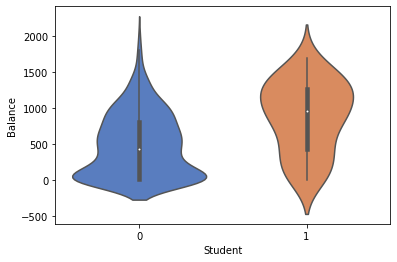

In [29]:
# for i in L:
#     s=i
ax = sns.violinplot(y=bal['Balance'], x=bal['Student'], data=bal, palette='muted')

In [30]:
baln0 = bal[bal['Balance'] > 0]
baln0.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333,0,0,1
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331,0,0,1


In [31]:
bal0 = bal[bal['Balance'] == 0]
bal0.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
11,12,15.045,1311,138,3,64,16,1,0,0,Caucasian,0,0,0,1
15,16,20.089,2525,200,3,57,15,0,0,1,African American,0,1,0,0
16,17,53.598,3714,286,3,73,17,0,0,1,African American,0,1,0,0
22,23,20.103,2631,213,3,61,10,1,0,1,African American,0,1,0,0
24,25,10.742,1757,156,3,57,15,0,0,0,Caucasian,0,0,0,1


Rating > 400

Limit >5000

Age > 85

Income > 100

Cards >= 7

In [32]:
bal0.max()

Unnamed: 0                399
Income                 92.112
Limit                    4612
Rating                    344
Cards                       6
Age                        84
Education                  19
Gender                      1
Student                     1
Married                     1
Ethnicity           Caucasian
Balance                     0
African American            1
Asian                       1
Caucasian                   1
dtype: object

Income                 92.112
Limit                    4612
Rating                    344
Cards                       6
Age                        84

In [33]:
balt = bal[bal['Limit']>4612]
balt.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331,0,0,1
5,6,80.180,8047,569,4,77,10,1,0,0,Caucasian,1151,0,0,1


In [34]:
balt = bal[(bal['Income']>92.112) & (bal['Limit']>4612)]
balt.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
28,29,186.634,13414,949,2,41,14,0,0,1,African American,1809,1,0,0
32,33,134.181,7838,563,2,48,13,0,0,0,Caucasian,526,0,0,1


In [35]:
balt = bal[(bal['Income']>92.112) & (bal['Limit']>4612) & (bal['Rating']>344)]
balt.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
28,29,186.634,13414,949,2,41,14,0,0,1,African American,1809,1,0,0
32,33,134.181,7838,563,2,48,13,0,0,0,Caucasian,526,0,0,1


In [36]:
balt = bal[(bal.Income >92.112) | (bal.Limit>4612) | (bal.Rating>344)]
balt

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331,0,0,1
5,6,80.180,8047,569,4,77,10,1,0,0,Caucasian,1151,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,83.948,7100,503,2,44,18,1,0,0,Caucasian,806,0,0,1
390,391,135.118,10578,747,3,81,15,0,0,1,Asian,1393,0,1,0
391,392,73.327,6555,472,2,43,15,0,0,0,Caucasian,721,0,0,1
394,395,49.794,5758,410,4,40,8,1,0,0,Caucasian,734,0,0,1


In [37]:
balt.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
count,206.000000,206.000000,206.000000,206.00000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,205.233010,62.328913,6460.679612,470.31068,2.975728,56.553398,13.300971,0.470874,0.106796,0.640777,855.577670,0.242718,0.252427,0.504854
std,117.656109,40.549208,1809.582648,122.27953,1.401878,17.190598,3.241002,0.500367,0.309606,0.480942,366.589744,0.429771,0.435463,0.501194
min,2.000000,10.842000,4307.000000,332.00000,1.000000,24.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103.250000,30.877750,5156.500000,380.00000,2.000000,44.000000,11.000000,0.000000,0.000000,0.000000,589.500000,0.000000,0.000000,0.000000
50%,213.000000,53.309000,5831.000000,433.50000,3.000000,55.000000,14.000000,0.000000,0.000000,1.000000,843.500000,0.000000,0.000000,1.000000
75%,309.750000,82.183500,7381.750000,525.75000,4.000000,69.000000,16.000000,1.000000,0.000000,1.000000,1083.250000,0.000000,0.750000,1.000000
max,400.000000,186.634000,13913.000000,982.00000,7.000000,98.000000,20.000000,1.000000,1.000000,1.000000,1999.000000,1.000000,1.000000,1.000000


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.183e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          6.19e-289
Time:                        22:22:29   Log-Likelihood:                -796.22
No. Observations:                 206   AIC:                             1612.
Df Residuals:                     196   BIC:                             1646.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -687.3348      5.490   -125.209      0.0

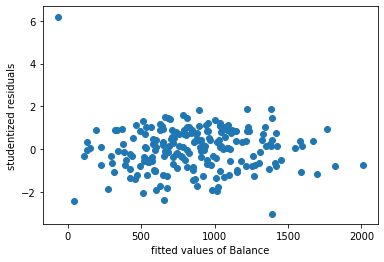

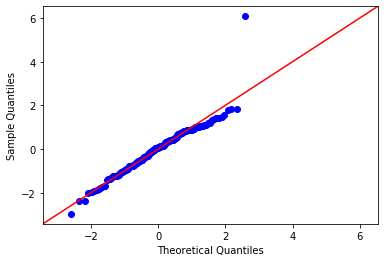

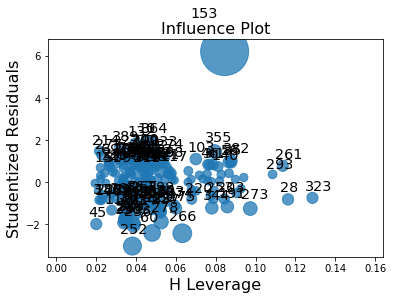

In [38]:
X1 = np.column_stack((
                      balt['Income'],
                      balt['Limit'],
#                       balt['Rating'],
                      balt['Cards'], 
                      balt['Age'],  
                      balt['Gender'], 
#                       balt['Education'],
                      balt['Student'], 
                      balt['Married'] ,
                      balt['Asian'],
                      balt['Caucasian']
                     ))
X1 = sm.add_constant(X1, prepend=True)  


y1 = balt.Balance  

results3 = sm.OLS(y1,X1).fit() 

print(results3.summary())

print("Beta parameters: {}".format(results3.params))
bal_resid = results3.outlier_test()['student_resid']
plt.scatter(results3.fittedvalues, bal_resid)
plt.xlabel('fitted values of Balance')
plt.ylabel('studentized residuals')
smg.graphics.gofplots.qqplot(bal_resid, line='45', fit=True)
plt.show()
fig = smg.graphics.regressionplots.influence_plot(results3, external=True, alpha=0.5, criterion='cooks')
